In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2024-02-08 21:12:00.076535: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)


60000

In [4]:
len(x_test),len(x_train)

(10000, 60000)

here 0 = black and 255 = white 

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

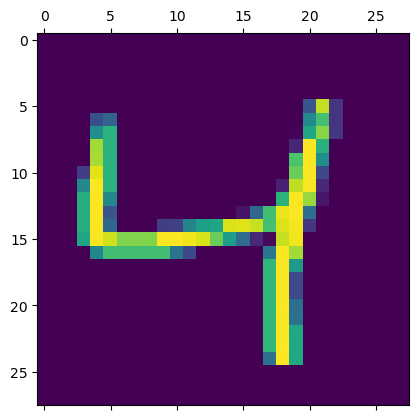

In [6]:
plt.matshow(x_train[2])

In [7]:
y_train[2]

4

In [8]:
first_five_elements = y_train[:5]

print(first_five_elements)

[5 0 4 1 9]


In [9]:
x_train.shape


(60000, 28, 28)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

In [14]:
x_test_flattened.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4668 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.3038 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.2665 - accuracy: 0.9259


In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 777us/step - loss: 0.2687 - accuracy: 0.9247


[0.2687317132949829, 0.9247000217437744]

### feeding image i.e actual image 

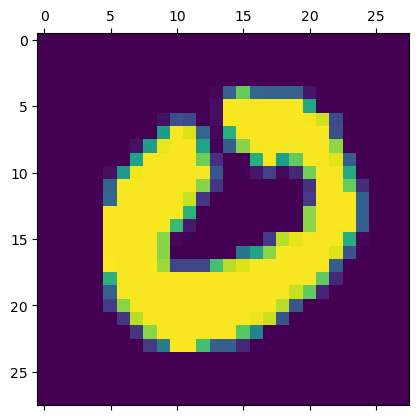

In [31]:
plt.matshow(x_test[25])

In [21]:
predict = model.predict(x_test_flattened)

313/313 [==============================] - 0s 677us/step


### predicting handwritten number on image 

In [33]:
predict[25]

array([9.9998641e-01, 1.6919508e-16, 2.2039204e-03, 1.3436866e-07,
       5.4706637e-05, 3.7981007e-01, 7.2837275e-01, 6.6420903e-06,
       2.6779955e-02, 1.5865107e-05], dtype=float32)

In [32]:
np.argmax(predict[25])

0

### first 5 actual handwritten numbers in dataset 

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### predicting first 5 handwritten number in dataset 

In [35]:
predicted_labels = [np.argmax(i) for i in predict]

In [36]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
cm = tf.math.confusion_matrix(labels= y_test,predictions = predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    5,    3,    1,    0],
       [   0, 1107,    3,    2,    0,    2,    4,    2,   15,    0],
       [   6,    8,  920,   14,    6,    5,   12,   10,   46,    5],
       [   4,    0,   20,  896,    0,   43,    2,   13,   24,    8],
       [   2,    1,    3,    2,  900,    0,   12,    4,   10,   48],
       [   9,    2,    4,   17,    7,  792,   14,    7,   33,    7],
       [  14,    3,    7,    1,    7,   12,  909,    2,    3,    0],
       [   1,    5,   22,    4,    5,    0,    0,  951,    2,   38],
       [   7,    6,    6,   15,    9,   26,    9,   11,  878,    7],
       [  11,    5,    1,    8,   16,    8,    0,   23,    8,  929]],
      dtype=int32)>

## tool to evaluate performance of model 

Text(95.72222222222221, 0.5, 'Truth')

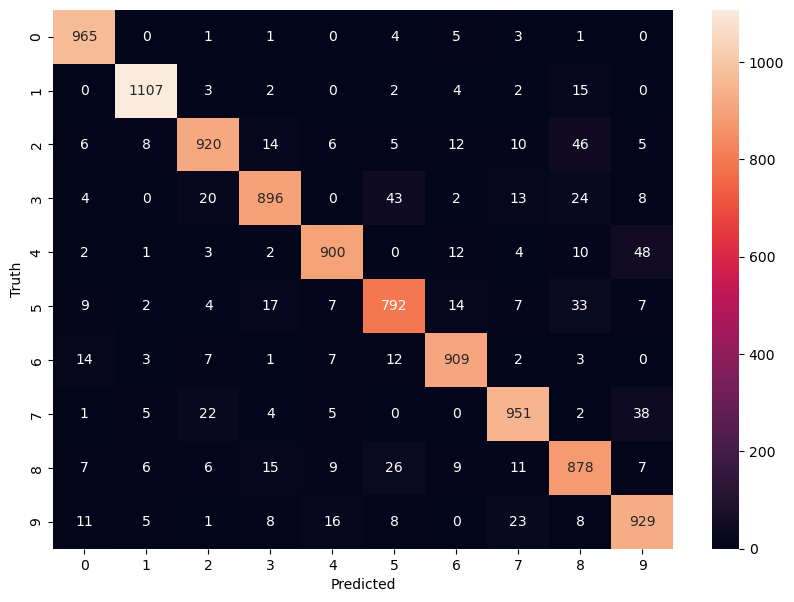

In [56]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# using hidden layers

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2713 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1244 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0884 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9835


In [47]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0841 - accuracy: 0.9745


[0.0841042548418045, 0.9745000004768372]

Text(95.72222222222221, 0.5, 'Truth')

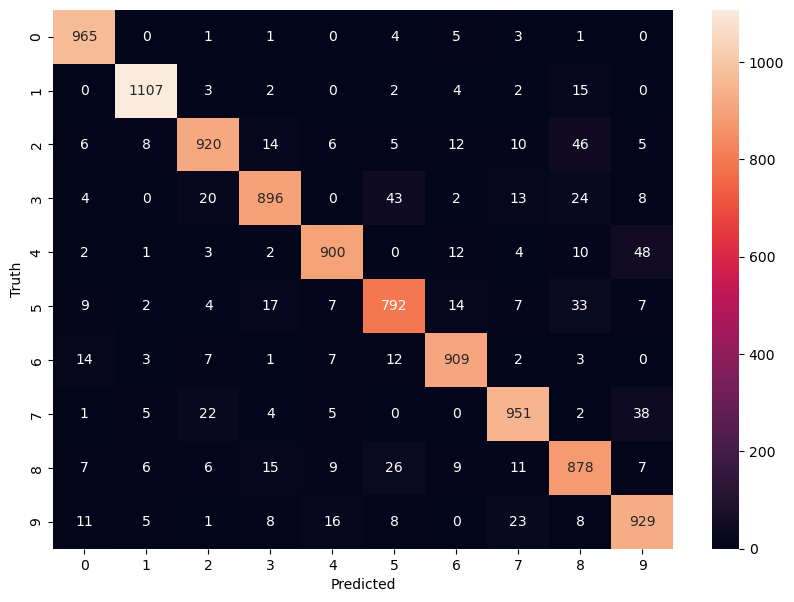

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2714 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1242 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0410 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0320 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [50]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 942us/step - loss: 0.0831 - accuracy: 0.9772


[0.08309371024370193, 0.9771999716758728]

313/313 [==============================] - 0s 856us/step


Text(95.72222222222221, 0.5, 'Truth')

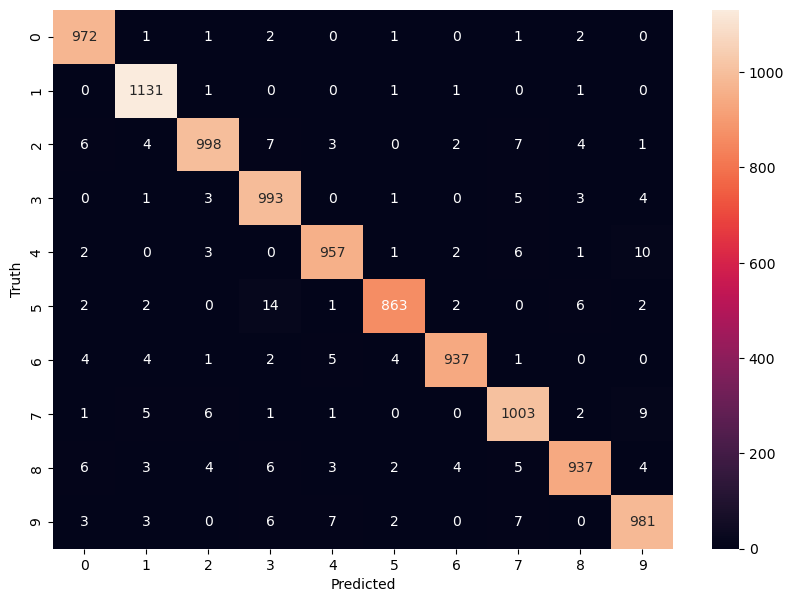

In [57]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')